In [10]:
#Python Library for Dataframe usage
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Libraries for Graph
import networkx as nx

In [2]:
#Serializing to a file
import _pickle as pickle

#Python Libraries for Mongos Database
import pymongo
from pymongo import MongoClient

In [3]:
#PandaDF of ingredients and their associated flavor molecules
#Opening the pickled file
pickle_in = open("../data/ingredients/ingredient_only_pd.pickle", "rb")

#Getting the dictionary from the pickle
ingredient_only_pd = pickle.load(pickle_in)

# Ingredient-Molecule Data Frame

In [4]:
ingredient_only_pd.head()

,_id,category,flavor_of_molecules,ingredient,molecule_IDs,molecules,set_molecules,set_molecules_ID,molecule_quantity
0,5ca27b8f13218a1eabac63d6,Animal Product,"[[faint], [very strong, mothball, animal, f...",egg,"[6322, 6736, 31252, 7909, 7284, 7501, 9609, 12...","[L-arginine, 3-Methylindole, 2,5-Dimethylpyraz...","{l-Menthol, 2,5-Dimethylfuran, 1-Penten-3-Ol, ...","{6561, 1130, 6322, 31289, 6202, 11509, 6140, 8...",55
9,5ca27b9b13218a1eabac63df,Beverage Alcoholic,"[[caramellic, spicy], [hop_oil, apricot, wh...",beer,"[5367531, 7795, 20083, 10558, 16617, 12209, 22...","[(2E,4E)-Undeca-2,4-dienal, Isoamyl butyrate, ...","{Ethyl Formate, 3-Phenylpropanoic acid, Pyrazi...","{5318042, 8052, 72277, 8025, 10393, 10558, 613...",263
11,5ca27b9d13218a1eabac63e1,Beverage Alcoholic,"[[fragrant, bread, woody, sweet, baked, a...",brandy,"[7362, 20653, 5364399, 61386, 12327, 7762, 805...","[2-Furaldehyde, 2-Methylhexanoic Acid, Ethyl 2...","{2-Phenylethanol, Ethyl caproate, Ethyl Format...","{7749, 5318042, 8051, 12327, 8025, 6561, 8892,...",50
13,5ca27ba013218a1eabac63e3,Beverage Alcoholic,"[[fragrant, bread, woody, sweet, baked, a...",apple brandy,"[7362, 20653, 5364399, 61386, 9862, 7775, 1661...","[2-Furaldehyde, 2-Methylhexanoic Acid, Ethyl 2...","{2-Phenylethanol, Ethyl caproate, Ethyl Format...","{7749, 5318042, 8051, 12327, 6561, 8025, 63801...",74
15,5ca27ba313218a1eabac63e5,Beverage Alcoholic,"[[fragrant, bread, woody, sweet, baked, a...",blackberry brandy,"[7362, 20653, 5364399, 61386, 12327, 7762, 805...","[2-Furaldehyde, 2-Methylhexanoic Acid, Ethyl 2...","{2-Phenylethanol, Ethyl caproate, Ethyl Format...","{7749, 5318042, 177, 8051, 12327, 8025, 6561, ...",51


In [6]:
print("List of catgories of food: ", ingredient_only_pd["category"].unique())

List of catgories of food:  ['Animal Product' 'Beverage Alcoholic' 'Beverage Caffeinated' 'Cereal'
 'Maize' 'Dairy' 'Essential Oil' 'Seafood' 'Fish' 'Flower' 'Fruit' 'Berry'
 'Fruit Citrus' 'Fruit Essence' 'Fungus' 'Herb' 'Meat' 'Nut' 'Seed'
 'Legume' 'Plant' 'Plant Derivative' 'Spice' 'Vegetable' 'Gourd'
 'Vegetable Root' 'Vegetable Stem' 'Vegetable Tuber' 'Cabbage' 'Additive']


In [7]:
print("number of ingredients: ", len(ingredient_only_pd["ingredient"]))

number of ingredients:  268


In [8]:
ingredient_only_pd["molecule_quantity"].describe()

count    268.000000
mean      98.694030
std       76.326004
min        1.000000
25%       20.750000
50%      102.500000
75%      149.000000
max      391.000000
Name: molecule_quantity, dtype: float64

(array([86., 19., 50., 53., 32., 16.,  9.,  2.,  0.,  1.]),
 array([  1.,  40.,  79., 118., 157., 196., 235., 274., 313., 352., 391.]),
 <a list of 10 Patch objects>)

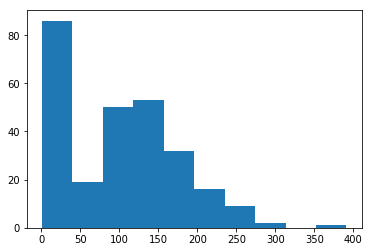

In [43]:
plt.hist(ingredient_only_pd["molecule_quantity"])

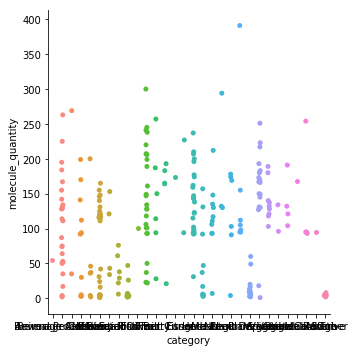

In [42]:
sns.catplot(x = "category", y = "molecule_quantity", data = ingredient_only_pd)

# Graphs

In [44]:
#Opening the pickled file for full graph
pickle_in = open("../data/graph/molecule_full_graph.pickle","rb")
full_graph = pickle.load(pickle_in)

/home/ryoiwata/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


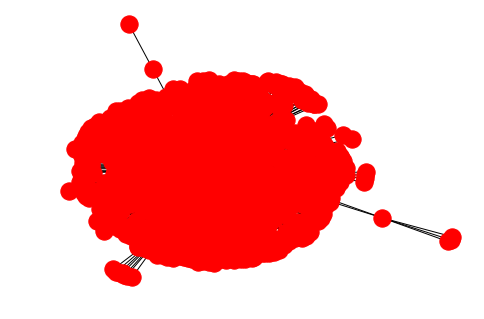

In [45]:
nx.draw(full_graph)

In [36]:
#returns a dictionary based on attributes
ingredient_node_attribute = nx.get_node_attributes(full_graph, 'ingredient_node')
molecule_node_attribute = nx.get_node_attributes(full_graph, 'molecule_node')

In [37]:
#list of ingredients
ingredient_list = []
for node, boolean in ingredient_node_attribute.items():    
    if boolean == True:
        ingredient_list.append(node)

#list of non ingredients
molecule_list = []
for node, boolean in molecule_node_attribute.items():   
    if boolean == True:
        molecule_list.append(node)

In [38]:
print("number of ingredients: ", len(ingredient_list))

number of ingredients:  267


In [39]:
print("number of molecules: ", len(molecule_list))

number of molecules:  1467


# Demo of Common Pairings
- Will turn this into a function

In [8]:
full_graph.nodes()

NodeView(('Egg', '3-(Methylthio)propionaldehyde', '2,3-Pentanedione', 'Octanal', 'Pyrrole', 'Methyl butyrate', 'hydrogen sulfide', 'm-cresol', 'methanethiol', 'CID 644104', 'Heptanoic Acid', 'Dimethyl disulfide', '1-Octen-3-Ol', '2,5-Dimethylfuran', 'thiamine', 'Styrene', '3-Methylbutanal', 'L-arginine', '2-Ethyl-3-Methylpyrazine', '2,5-Dimethylpyrazine', '4-Methyl-2-pentanone', '1-octanol', 'Propionaldehyde', 'l-Menthol', '2-Methylbutyraldehyde', 'Dl-Phenylalanine', '2-Ethylfuran', 'phenol', 'octanoic acid', 'dimethyl sulfide', '2-Pentanone', '1-Penten-3-Ol', '4-Methylthiazole', 'Thiamine Hydrochloride', 'Nonanal', 'L-histidine', 'Tiglic aldehyde', 'isopropanol', '2-Pentylfuran', '50-69-1', 'Isobutyraldehyde', 'Pyridine', 'P-Cresol', 'indole', 'Diethyl sulfide', '1-Undecanol', 'Octan-2-one', '5-Methylfurfural', '3-Hexanone', 'Pyrazine', 'lactic acid', 'L-phenylalanine', '2-Methylpyrazine', 'phenylacetaldehyde', '3-Methylindole', 'betaine', 'Beer', 'Ethyl Propionate', '2,4-dihydroxyben

In [ ]:
demo_G=nx.Graph()

#iterate through each row of flavorDB based on if index is in random sample
for index, row in flavorDB_pandas.iterrows():
    #set of the ingredient from the "rows"
    set1= row["set_molecules"]
    #name of the ingredient from the "rows" 
    ingredient_1 = row["ingredient"]

    if ingredient_1 in ["coffee", "milk"]:
        for molecule in set1:
            # flavor_matrix_df[ingredient_1][molecule] = {'weight': 1}
            demo_G.add_node(ingredient_1)
            demo_G.node[ingredient_1]["ingredient_node"] = True
            demo_G.add_node(molecule)
            demo_G.node[molecule]["molecule_node"] = True
            demo_G.add_edge(ingredient_1, molecule)

In [ ]:
pos=nx.spring_layout(demo_G)
nx.draw_networkx_nodes(demo_G,pos,
                       nodelist=ingredient_nodes,
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(demo_G,pos,
                       nodelist=molecule_nodes,
                       node_color='b',
                       node_size=500,
                   alpha=0.8)